<a href="https://colab.research.google.com/github/EmilianoCelleri/Simulacion_Python/blob/main/simulacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://www.labrujula24.com/wp-content/uploads/2022/08/figuritas-1536x864.jpg'>

Problema a Simular: El problema que queremos simular es el proceso de llenar un álbum de figuritas mediante la apertura de paquetes de figuritas. Queremos evaluar cuántos paquetes son necesarios para completar el álbum y a partir de eso construir un grafica que represente la distribución.

Objetivo de la Simulación: El objetivo de la simulación es proporcionar una estimación de cuántos paquetes se necesitan en promedio para llenar el álbum.

Importamos las librerias que vamos a utilizar para la simulación

In [ ]:
# Imports de las librerias a utilizar

import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Estetica de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

# Para evitar que nos aparezcan resultados en notación científica
np.set_printoptions(suppress=True)

Definimos las variables de cantidad de figuritas y cantidad de figuritas por paquete

In [ ]:
# Cantidad de figuritas totales del album
figus_total = 860

# Cantidad de figuritas por paquete
figus_paquete = 5


Experimento aleatorio: Definimos una funcion cuantos_paquetes que dado el tamaño del album y la cantidad de figuritas por paquete, generara un album y va a simular la cantidad de paquetes que se necesitan para completarlo.


Funciones principales de la simulación

In [ ]:
def crear_album(figus_total):
  '''
  Funcion para crear el album de figuritas, retorna un album
  '''
  album = np.zeros(figus_total)
  return album

def comprar_paquete(figus_total, figus_paquete):
  '''
  Funcion para comprar paquetes, retorna 5 figuritas
  '''
  rango_figus = range(0, figus_total)
  paquete = random.sample(rango_figus, figus_paquete)
  return paquete

def pegar_figus(album, paquete):
  '''
  Funcion para pegar figuritas
  '''
  for i in paquete:
    album[i] = 1
  return album

def album_incompleto(album):
  '''
  Funcion para comprobar si el album esta incompleto
  '''
  if np.all(album==1):
    return False
  else:
    return True

def cuantos_paquetes(figus_total, figus_paquete):
  '''
  Funcion principal para saber cuantos paquetes de figuritas se necesitan para llenar el album, retorna la cantidad de paquetes
  '''
  paquetes_comprados = 0
  album = crear_album(figus_total)
  while (album_incompleto(album)) == True:
    paquete = comprar_paquete(figus_total, figus_paquete)
    pegar_figus(album, paquete)
    paquetes_comprados += 1
  return paquetes_comprados




Pruebas de todas las funciones implementadas

In [ ]:
'''Prueba funcion crear album

album = crear_album(figus_total)
print(album)
print(type(album))'''

In [ ]:
'''Prueba comprar paquete

paquete = comprar_paquete(figus_total, figus_paquete)
print(paquete)
print(type(paquete))'''

In [ ]:
'''Prueba album_incompleto
print(album)
print(album_incompleto(album))
album = np.ones(figus_total)
print(album)
print(album_incompleto(album))'''

In [ ]:
'''Prueba pegar_figus
print(album)
paquete = comprar_paquete(figus_total, figus_paquete)
print(paquete)

pegar_figus(album, paquete)
print(album)'''

In [ ]:
'''Prueba cuantos_paquetes

print(cuantos_paquetes(figus_total, figus_paquete))'''

Para el armado de la muestra aleatoria definimos una semilla, fijamos N en 100 para armar 100 muestras.


In [ ]:
random.seed(10)
N = 100

muestras = [cuantos_paquetes(figus_total, figus_paquete) for _ in range(N)]

print(muestras)



[1175, 1876, 1066, 924, 1332, 1515, 947, 1328, 1211, 1081, 1168, 1361, 1025, 1413, 1183, 1522, 1461, 1105, 1378, 1139, 1679, 1232, 1308, 1180, 1250, 938, 1072, 1451, 1215, 1415, 1487, 1355, 1251, 1157, 1391, 1279, 1086, 1005, 1101, 855, 1222, 1213, 1297, 1595, 1203, 1360, 1457, 1357, 1646, 1804, 1045, 1263, 1174, 1510, 959, 1109, 1487, 992, 1661, 1304, 1418, 1337, 1290, 1148, 1153, 1250, 997, 955, 1008, 1158, 1236, 1581, 1458, 1134, 1167, 1074, 1383, 1236, 965, 1016, 1129, 1027, 1530, 1204, 1173, 1104, 1369, 1716, 1109, 1068, 1250, 1042, 1329, 1251, 1235, 1182, 1090, 1045, 1067, 1056]


Estimamos la esperanza para saber cuantos paquetes se necesitan para completar el album, en este caso el promedio de lo observado en las muestras, para eso utilizamos la funcion .mean de numpy


In [ ]:
print(np.mean(muestras))

1245.15


Utilizamos un histograma de la libreria matplotlib para mostrar la grafica

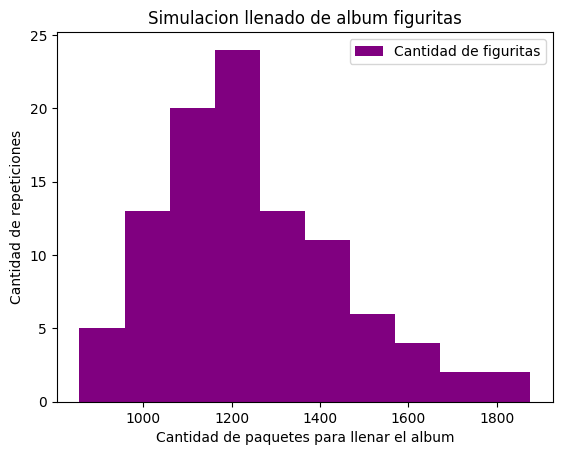

In [ ]:
plt.hist(muestras, color='purple', label='Cantidad de figuritas')
plt.title("Simulacion llenado de album figuritas")
plt.xlabel('Cantidad de paquetes para llenar el album')
plt.ylabel('Cantidad de repeticiones')
plt.legend();